In [31]:
import numpy as np
import pandas as pd
import datetime
# import matplotlib.pyplot as plt, mpld3
import matplotlib.pyplot as plt
import seaborn as sns

# NYC Collision Data Analysis

## Focusing on casualty statistics over different time periods

In [32]:
'''
Some Formatting functions
'''


def empty_to_zero(val):
    '''Converts empty values to 0'''
    val = val.strip('\s+')
    return val if len(val) else 0


def convert_to_numeric(df, column_list):
    '''Given a DataFrame list of columns, converts the empty values to zero'''
    df[column_list] = df[column_list].apply(pd.to_numeric, errors='coerce')

In [33]:
'''
Setup Some Variables
'''
# I'm omitting longitude, latitude, the vehicle types as well as crash contributing factors.
cols_requested = ['COLLISION_ID', 'CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
                  'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']

# To ensure that the colums are of the expected data type
crash_dtypes = {'CRASH DATE': str,
                'CRASH TIME': str,
                'BOROUGH': str,
                'ZIP CODE': str,
                'LOCATION': str,
                'ON STREET NAME': str,
                'CROSS STREET NAME': str,
                'OFF STREET NAME': str,
                }

# Rename some colums to ones that I believe are shorter and/or more meaningful
cols_rename = {'CRASH DATE': 'DATE',
               'CRASH TIME': 'TIME',
               'ZIP CODE': 'ZIP_CODE',
               'ON STREET NAME': 'ON_STREET_NAME',
               'CROSS STREET NAME': 'CROSS_STREET_NAME',
               'OFF STREET NAME': 'OFF_STREET_NAME',
               'NUMBER OF PERSONS INJURED': 'NUM_PERSONS_INJURED',
               'NUMBER OF PERSONS KILLED': 'NUM_PERSONS_KILLED',
               'NUMBER OF PEDESTRIANS INJURED': 'NUM_PEDESTRIANS_INJURED',
               'NUMBER OF PEDESTRIANS KILLED': 'NUM_PEDESTRIANS_KILLED',
               'NUMBER OF CYCLIST INJURED': 'NUM_CYCLISTS_INJURED',
               'NUMBER OF CYCLIST KILLED': 'NUM_CYCLISTS_KILLED',
               'NUMBER OF MOTORIST INJURED': 'NUM_MOTORISTS_INJURED',
               'NUMBER OF MOTORIST KILLED': 'NUM_MOTORISTS_KILLED'
               }

# Columns that contain numeric values
numeric_cols = ['NUM_PERSONS_INJURED',
                'NUM_PERSONS_KILLED',
                'NUM_PEDESTRIANS_INJURED',
                'NUM_PEDESTRIANS_KILLED',
                'NUM_CYCLISTS_INJURED',
                'NUM_CYCLISTS_KILLED',
                'NUM_MOTORISTS_INJURED',
                'NUM_MOTORISTS_KILLED']

# These ordered lists are useful for plotting charts
day_names_order = ["Monday", "Tuesday", "Wednesday",
                   "Thursday", "Friday", "Saturday", "Sunday"]
day_abbr_order = [d[0:3] for d in day_names_order]
month_names_order = ["January", "February", "March", "April", "May",
                     "June", "July", "August", "September", "October", "November", "December"]
month_abbr_order = [m[0:3] for m in month_names_order]

# The following DataFrame columns that will have their empty values converted to zero using the
# 'empty_to_zero' function
convert_cols = {
    'NUMBER OF PERSONS INJURED': empty_to_zero,
    'NUMBER OF PERSONS KILLED':  empty_to_zero,
    'NUMBER OF PEDESTRIANS INJURED': empty_to_zero,
    'NUMBER OF PEDESTRIANS KILLED': empty_to_zero,
    'NUMBER OF CYCLIST INJURED': empty_to_zero,
    'NUMBER OF CYCLIST KILLED': empty_to_zero,
    'NUMBER OF MOTORIST INJURED': empty_to_zero,
    'NUMBER OF MOTORIST KILLED': empty_to_zero
}

# These are the 4 categories supplied by the NYPD
# 'person' status should be a combination of the other three categories
# TODO I need to verify the relationship between 'person' and the other three categories
victim_categories = ['person', 'cyclist', 'motorist', 'pedestrian']

# These are the Matplotlib Tableau colors
bar_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red',
              'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

base_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

In [34]:
'''
Read the NYC collision data csv. 
The Collision Dataset is provided by NYPD and is available here.
https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95
'''
crash = pd.read_csv('./Motor_Vehicle_Collisions_Aug15_2023.csv',
                    index_col='COLLISION_ID', usecols=cols_requested, dtype=crash_dtypes, converters=convert_cols)

In [35]:
'''
Print out the original column names and the newly changed column names
'''
original_col_names = crash.columns.to_list()
print("Original Crash Column Names")
print(original_col_names)
crash.rename(columns=cols_rename, inplace=True)
print("Renamed Crash Columns Names")
print(crash.columns.to_list())

Original Crash Column Names
['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']
Renamed Crash Columns Names
['DATE', 'TIME', 'BOROUGH', 'ZIP_CODE', 'LOCATION', 'ON_STREET_NAME', 'CROSS_STREET_NAME', 'OFF_STREET_NAME', 'NUM_PERSONS_INJURED', 'NUM_PERSONS_KILLED', 'NUM_PEDESTRIANS_INJURED', 'NUM_PEDESTRIANS_KILLED', 'NUM_CYCLISTS_INJURED', 'NUM_CYCLISTS_KILLED', 'NUM_MOTORISTS_INJURED', 'NUM_MOTORISTS_KILLED']


In [36]:
# Ensure that the 'numeric_cols' column values are numeric and not string values
convert_to_numeric(crash, numeric_cols)

In [37]:
crash.shape

(2017370, 16)

In [38]:
crash.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2017370 entries, 4455765 to 4647913
Data columns (total 16 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   DATE                     object
 1   TIME                     object
 2   BOROUGH                  object
 3   ZIP_CODE                 object
 4   LOCATION                 object
 5   ON_STREET_NAME           object
 6   CROSS_STREET_NAME        object
 7   OFF_STREET_NAME          object
 8   NUM_PERSONS_INJURED      int64 
 9   NUM_PERSONS_KILLED       int64 
 10  NUM_PEDESTRIANS_INJURED  int64 
 11  NUM_PEDESTRIANS_KILLED   int64 
 12  NUM_CYCLISTS_INJURED     int64 
 13  NUM_CYCLISTS_KILLED      int64 
 14  NUM_MOTORISTS_INJURED    int64 
 15  NUM_MOTORISTS_KILLED     int64 
dtypes: int64(8), object(8)
memory usage: 261.7+ MB


In [39]:
'''
General Description with the numeric data displayed as a 'float' rather than the default scientific notation
'''
pd.set_option('display.float_format', lambda x: '%8.2f' % x)
crash.describe()

,NUM_PERSONS_INJURED,NUM_PERSONS_KILLED,NUM_PEDESTRIANS_INJURED,NUM_PEDESTRIANS_KILLED,NUM_CYCLISTS_INJURED,NUM_CYCLISTS_KILLED,NUM_MOTORISTS_INJURED,NUM_MOTORISTS_KILLED
count,2017370.00,2017370.00,2017370.00,2017370.00,2017370.00,2017370.00,2017370.00,2017370.00
mean,0.30,0.00,0.06,0.00,0.03,0.00,0.22,0.00
std,0.69,0.04,0.24,0.03,0.16,0.01,0.65,0.03
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,43.00,8.00,27.00,6.00,4.00,2.00,43.00,5.00


In [40]:
'''
Merge 'CRASH DATE' and 'CRASH TIME' into one column 'CRASH DATE'
Convert 'CRASH_DATE' to a Python datetime object
Remove the now unnecessary 'TIME' column
'''
crash['DATE'] = pd.to_datetime(crash['DATE'] + " " + crash['TIME'])
crash.drop(columns=['TIME'], inplace=True)

crash['DATE'] = pd.to_datetime(crash['DATE'])
crash['DATE'].tail()

COLLISION_ID
4648110   2023-07-03 18:05:00
4648117   2023-07-22 21:39:00
4648366   2023-07-02 17:55:00
4648129   2023-07-22 13:15:00
4647913   2023-07-22 03:00:00
Name: DATE, dtype: datetime64[ns]

In [41]:
crash['DATE'].describe()

count                          2017370
mean     2017-05-13 17:54:54.650598912
min                2012-07-01 00:05:00
25%                2014-12-19 13:00:15
50%                2017-03-29 10:07:30
75%                2019-06-09 17:50:00
max                2023-08-12 23:56:00
Name: DATE, dtype: object


### From the above ```crash['DATE'].describe()```

We can see that the first collision record was on July 7 2012
The last, for this iteration is August 15 2023, which is today.

In [42]:
''' Create a "start_date" and "end_date" variable, which is useful for our charts'''
start_date = crash['DATE'].dt.date.min()
end_date = crash['DATE'].dt.date.max()
print("Start Date: {0} - End Date: {1}".format(start_date, end_date))

Start Date: 2012-07-01 - End Date: 2023-08-12


In [43]:
'''
The 'BOROUGH' column contains the 5 boroughs of New Yor City
BROOKLYN, BRONX, MANHATTAN, QUEENS and 'STATEN ISLAND' 
Unfortunately the most frequent BOROUGH is the empty one.
'''
crash.fillna(value={'BOROUGH': 'UNKNOWN'}, inplace=True)
crash['BOROUGH'].describe()

count     2017370
unique          6
top       UNKNOWN
freq       627585
Name: BOROUGH, dtype: object

### The "UNKNOWN" Borough

I believe NYPD don't record the Borough in certain situations. For example, if the collision occured on one of the main bridges between boroughs, or if the collision occured on any one of NYC's many expressways or parkways. 
Further investigation would be needed to confirm this. 

I previously reached out to the open data team for more information on this, but got no reply

In [44]:
crash['BOROUGH'].unique()

array(['UNKNOWN', 'BROOKLYN', 'BRONX', 'MANHATTAN', 'QUEENS',
       'STATEN ISLAND'], dtype=object)

In [45]:
'''
ZIP_CODE
As with the BOROUGH column, the postal ZIP_CODE  is often left empty.
In this case though, the ZIP_CODE with the most collisions is 11207, which is in Brooklyn. 
It has a pretty large population, not far of 80,000 people. 
Check it out here: https://www.unitedstateszipcodes.org/11207/
'''
crash['ZIP_CODE'].describe()

count     1389547
unique        234
top         11207
freq        26853
Name: ZIP_CODE, dtype: object

In [46]:
crash.fillna(value={'ZIP_CODE': 'UNKNOWN'}, inplace=True)
crash['ZIP_CODE'].head()

COLLISION_ID
4455765    UNKNOWN
4513547    UNKNOWN
4541903    UNKNOWN
4456314      11208
4486609      11233
Name: ZIP_CODE, dtype: object

### The "UNKNOWN" Zip Code

See my note on the "UNKNOWN" borough above. 

In [47]:
'''
Some Cyclist Stats From July 2012 to today
'''
tot_cyclists_killed = crash['NUM_CYCLISTS_KILLED'].sum()
tot_cyclists_injured = crash['NUM_CYCLISTS_INJURED'].sum()
print("# cyclists killed : " + str(tot_cyclists_killed))
print("# cyclists injured: " + str(tot_cyclists_injured))

# cyclists killed : 226
# cyclists injured: 52681


In [48]:
'''
Set up come colors
'''
color = 'k'
plt.rcParams['text.color'] = color
plt.rcParams['axes.labelcolor'] = color
plt.rcParams['xtick.color'] = 'b'
plt.rcParams['ytick.color'] = 'b'

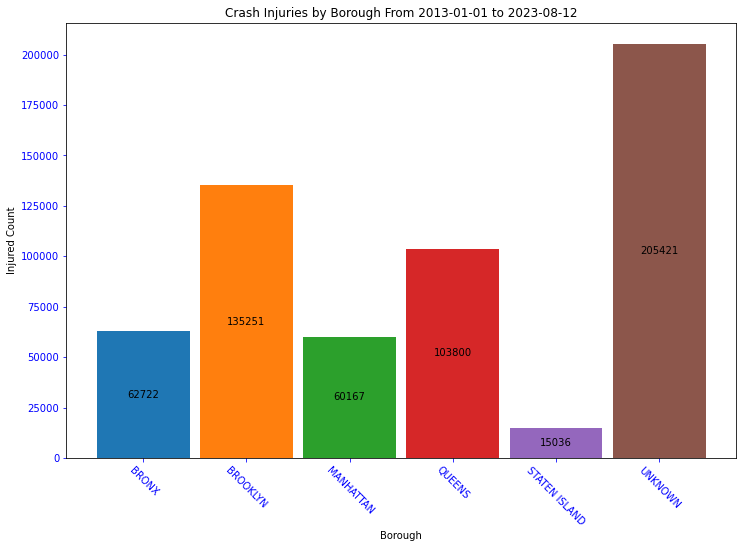

In [108]:
'''
Create a plot using Matplotlib with details on the number of people injured, by borough, since records began.
'''
persons_injured_by_borough = crash.groupby(
    by=['BOROUGH'])['NUM_PERSONS_INJURED'].sum()
# print(persons_injured_by_borough)
boroughs = persons_injured_by_borough.index
# print(boroughs)
width = 0.9
y_pos = np.arange(len(persons_injured_by_borough))
x_pos = np.arange(len(boroughs))
inj_bars = plt.bar(y_pos, persons_injured_by_borough, width, color=bar_colors)
# plt.bar_label(inj_bars, label_type='center', fmt='{:8,.0f}')
plt.bar_label(inj_bars, label_type='center', fmt="%d")
plt.xticks(x_pos, boroughs)
plt.title("Crash Injuries by Borough From {0} to {1}".format(
    start_date, end_date))
plt.xlabel("Borough")
plt.ylabel("Injured Count")
plt.xticks(rotation=315)
plt.show()

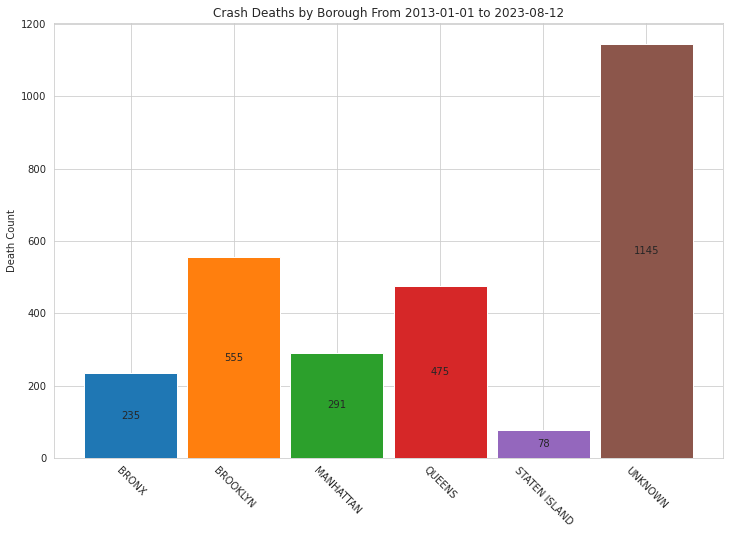

In [354]:
'''
Create a plot using Matplotlib with details on the number of people killed, by borough, since records began.
'''
persons_killed_by_borough = crash.groupby(
    by=['BOROUGH'])['NUM_PERSONS_KILLED'].sum()
persons_killed_by_borough
boroughs = persons_killed_by_borough.index
width = 0.9
y_pos = np.arange(len(persons_killed_by_borough))
x_pos = np.arange(len(boroughs))
k_bars = plt.bar(y_pos, persons_killed_by_borough, width, color=bar_colors)
# plt.bar_label(k_bars, label_type='center', fmt="{:6,.0f}")
plt.bar_label(k_bars, label_type='center', fmt="%d")
plt.xticks(x_pos, boroughs)
plt.title("Crash Deaths by Borough From {0} to {1}".format(
    start_date, end_date))
plt.ylabel("Death Count")
plt.xticks(rotation=315)

plt.show()

### Borough Chart Results

From the two charts we can see that Brooklyn leads the city in crash deaths and injuries. 

The "UNKNOWN" borough has has the highest total overall, but ufortunately we don't know where those collisions should be. 

A future project may be to find the borough based on the "ZIP_CODE" or "LOCATION" if available.

***

In [253]:
'''
Set up some date columns: YEAR, MONTH_NAME, DAY_NAME, HOUR
and remove any records for 2012
'''
crash['YEAR'] = crash['DATE'].dt.year
# Get rid of 2012 as it only has 6 months of data
no_2012_mask = crash['YEAR'] > 2012
crash = crash[no_2012_mask]

# Reset the start_date as it has been changed
start_date = crash['DATE'].dt.date.min()
year_order = crash['YEAR'].sort_values().unique()
print(year_order)

# Actually month abbreviated name
crash['MONTH_NAME'] = crash['DATE'].dt.month_name().str[0:3]

crash['HOUR'] = crash['DATE'].dt.strftime("%H")
# Need to convert hour_order to a Python list instead of Numpy array
hour_order = crash['HOUR'].sort_values().unique().tolist()
print("Hour order")
print(hour_order)

crash['DAY_NAME'] = crash['DATE'].dt.strftime("%a")

[2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]
Hour order
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']


In [52]:
crash_by_year_killed_injured = crash.groupby(by=['YEAR']).agg({'NUM_PERSONS_KILLED': 'sum', 'NUM_PERSONS_INJURED': 'sum'}).sort_values(
    by=['NUM_PERSONS_KILLED', 'NUM_PERSONS_INJURED'], ascending=False)

crash_by_year_killed_injured

,NUM_PERSONS_KILLED,NUM_PERSONS_INJURED
YEAR,,
2013,297,55124
2021,296,51779
2022,287,51919
2020,269,44614
2014,262,51223
2017,256,60656
2016,246,60317
2019,244,61389
2015,243,51358


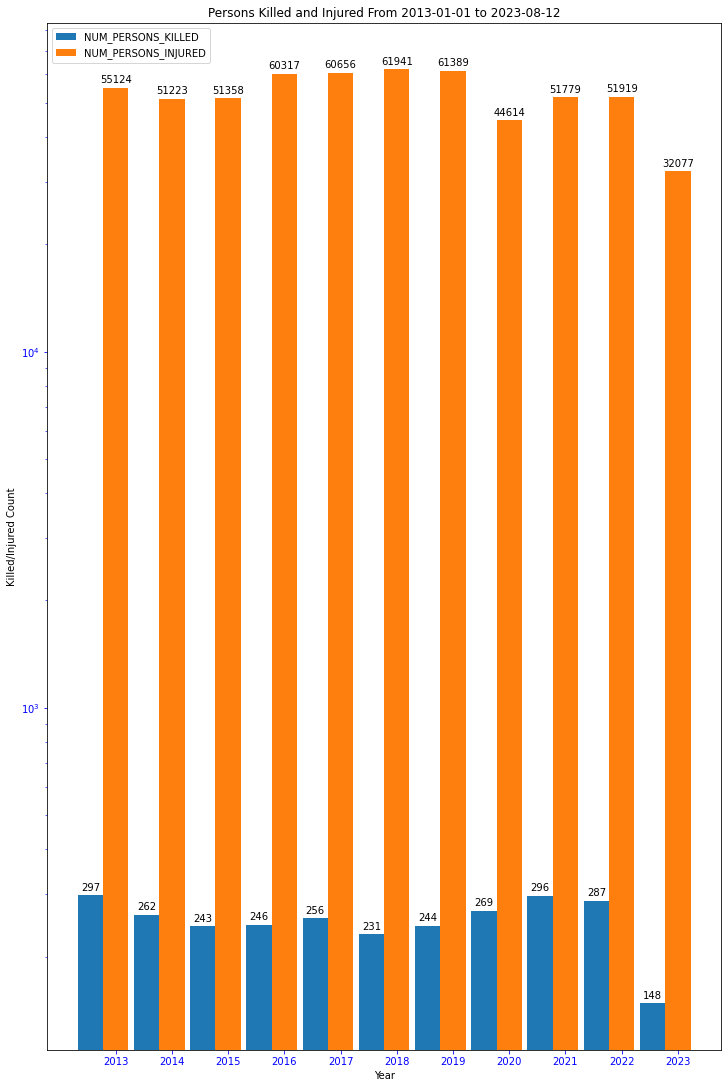

In [109]:
'''
Create a plot using Matplotlib with Yearly details on the number of people injured, by borough, since records began.
'''
crash_by_year_killed_injured = crash_by_year_killed_injured.sort_values(
    by='YEAR')
killed_injured = {
    'NUM_PERSONS_KILLED': crash_by_year_killed_injured.NUM_PERSONS_KILLED,
    'NUM_PERSONS_INJURED': crash_by_year_killed_injured.NUM_PERSONS_INJURED
}
x = np.arange(len(year_order))  # the label locations
width = 0.45  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(10, 15), layout='constrained')

for killed_or_injured, count in killed_injured.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, count, width, label=killed_or_injured)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Year')
ax.set_ylabel('Killed/Injured Count')
ax.set_title('Persons Killed and Injured From {0} to {1}'.format(
    start_date, end_date))
ax.set_xticks(x + width, year_order)
# ax.legend(loc='upper left', ncols=2)
ax.legend(loc='upper left')
ax.set_yscale('log')
plt.show()

### Collision Injuries and Deaths since 2013

This chart shows that 2013, 2020 and 2021 were the worst years for traffic fatalities. However, for collision injuries,  2016 to 2019 were the worst. The covid years had a small reduction in injuries, but 2023 may put an end to that trend.

***

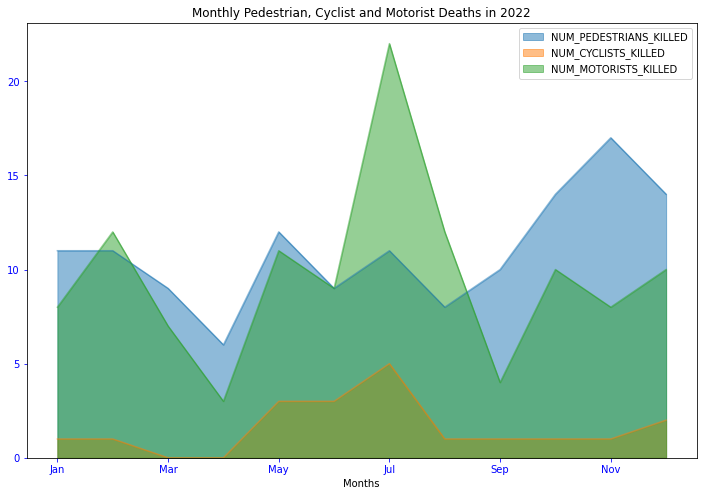

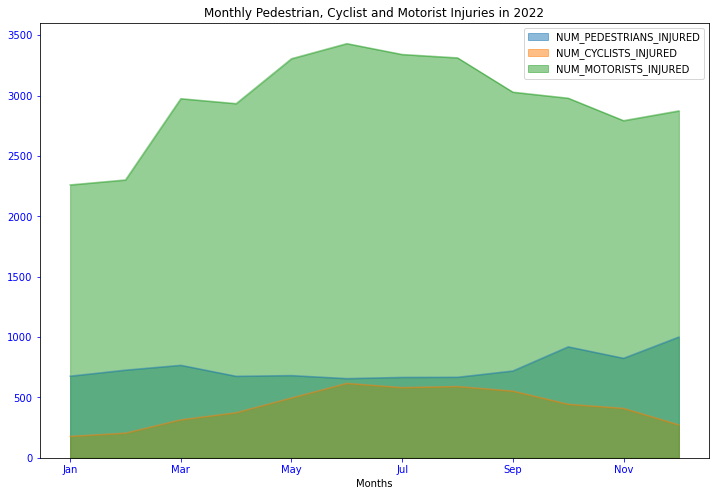

In [110]:
numeric_ped_cyc_motor_cols = [x for x in numeric_cols if 'PERSONS' not in x]
killed_cols = [x for x in numeric_ped_cyc_motor_cols if 'KILL' in x]
injured_cols = [x for x in numeric_ped_cyc_motor_cols if 'INJ' in x]

stats_for_2022_mask = crash['YEAR'] == 2022
crash_2022 = crash[stats_for_2022_mask]
killed_crash_2022 = crash_2022[['MONTH_NAME'] + killed_cols]
injured_crash_2022 = crash_2022[['MONTH_NAME'] + injured_cols]

plt.rcParams['figure.figsize'] = [12, 8]

killed_2022_monthly = killed_crash_2022.groupby(
    ['MONTH_NAME']).agg('sum', killed_cols)
killed_2022_monthly.loc[month_abbr_order].plot.area(
    xlabel='Months',
    stacked=False,
    title='Monthly Pedestrian, Cyclist and Motorist Deaths in 2022'.format(start_date, end_date))

plt.show()
injured_2022_monthly = injured_crash_2022.groupby(
    ['MONTH_NAME']).agg('sum', injured_cols)

injured_2022_monthly.loc[month_abbr_order].plot.area(
    stacked=False,
    xlabel='Months',
    title='Monthly Pedestrian, Cyclist and Motorist Injuries in 2022'.format(start_date, end_date))
plt.show()

In [55]:
# hide
# crash.pivot_table('NUM_CYCLISTS_KILLED', ['BOROUGH'], 'YEAR')
# crash.pivot_table('NUM_CYCLISTS_KILLED', ['YEAR'], 'BOROUGH')
# crash.pivot_table('NUM_CYCLISTS_KILLED', index='YEAR', columns='BOROUGH', aggfunc=('sum'))
pi = crash.pivot_table('NUM_PERSONS_INJURED', index='YEAR',
                       columns='BOROUGH', aggfunc=('sum'))
print(pi)
ci = crash.pivot_table('NUM_CYCLISTS_INJURED', index='YEAR',
                       columns='BOROUGH', aggfunc=('sum'))
print(ci)

BOROUGH  BRONX  BROOKLYN  MANHATTAN  QUEENS  STATEN ISLAND  UNKNOWN
YEAR                                                               
2013      6259     15411       7585   10686           2111    13072
2014      5886     14245       6909   10031           1577    12575
2015      5626     13706       6531   10423           1548    13524
2016      6050     13452       6236   10928           1484    22167
2017      5844     12047       5648   10103           1550    25464
2018      6289     13198       5436   10818           1340    24860
2019      6528     13008       5242   11095           1403    24113
2020      5218      9699       3577    7268            935    17917
2021      5757     11675       4630    8450           1095    20172
2022      5827     11513       5129    8516           1227    19707
2023      3438      7297       3244    5482            766    11850
BOROUGH  BRONX  BROOKLYN  MANHATTAN  QUEENS  STATEN ISLAND  UNKNOWN
YEAR                                            

In [56]:
# Combine the INJURED and KILLED columns into one 'CASUALTIES' column.
crash['PERSON_CASUALTY_COUNT'] = crash.NUM_PERSONS_INJURED + \
    crash.NUM_PERSONS_KILLED
crash['PEDESTRIAN_CASUALTY_COUNT'] = crash.NUM_PEDESTRIANS_INJURED + \
    crash.NUM_PEDESTRIANS_KILLED
crash['CYCLIST_CASUALTY_COUNT'] = crash.NUM_CYCLISTS_INJURED + \
    crash.NUM_CYCLISTS_KILLED
crash['MOTORIST_CASUALTY_COUNT'] = crash.NUM_MOTORISTS_INJURED + \
    crash.NUM_MOTORISTS_KILLED
crash.head(60)

kmm = (crash.NUM_PERSONS_KILLED > 0) & (crash.NUM_PERSONS_INJURED > 0)
# Check that it looks good
crash[kmm][['NUM_PERSONS_KILLED', 'NUM_PERSONS_INJURED',
            'PERSON_CASUALTY_COUNT']].head()

,NUM_PERSONS_KILLED,NUM_PERSONS_INJURED,PERSON_CASUALTY_COUNT
COLLISION_ID,,,
4407693,1,4,5
4457151,1,1,2
4457192,1,2,3
4457191,1,3,4
4487497,1,1,2


In [112]:
'''
Function to print count values above or to the side of chart bars
I got the original function from this useful site, https://www.statology.org
Original Fuction: https://www.statology.org/seaborn-barplot-show-values/
'''


def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:6,.0f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center", fontsize=12)
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:6,.0f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left", fontsize=12)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [113]:
'''
Helper functions for creating multiple charts based on Grouped statistics
Grouped time periods can be 'HOUR', 'MONTH', 'YEAR', 'DAY_NAME'

Statistics will be created for the below columns. 
    PERSON_CASUALTY_COUNT
    PEDESTRIAN_CASUALTY_COUNT
    CYCLIST_CASUALTY_COUNT
    MOTORIST_CASUALTY_COUNT
'''


def create_grouped_casualty_data_by_category(victim_categories, time_group="YEAR", order_list=None):
    ''' 
    time_group can be 'HOUR', 'DAY_OF_WEEK', 'MONTH', 'YEAR' 
    '''
    time_group = time_group.upper()
    all_casualty_data = []

    for category in victim_categories:
        cat_upper = category.upper()
        casualty_label = cat_upper + '_CASUALTY_COUNT'

        casualty_data = crash.groupby(
            by=[time_group], as_index=True).agg({casualty_label: 'sum'})
        if order_list and len(order_list):
            casualty_data = casualty_data.loc[order_list]

        category_data = {
            'category': category,
            'casualty_label': casualty_label,
            'casualty_data':  casualty_data
        }

        all_casualty_data.append(category_data)
    return all_casualty_data


def create_bar_plots_for_casualty_data(sns, axes, order_list, crash_victims_data):
    for idx, category_data in enumerate(crash_victims_data):
        xlabel = None
        ylabel = None
        # Casualty Chart
        category_title = category_data['category'].title()
        chart_title = "{0} Casualties".format(category_title)

        casualty_max = category_data['casualty_data'][category_data['casualty_label']].max(
        )
        casualty_values = category_data['casualty_data'][category_data['casualty_label']].to_list(
        )

        casualty_colors = ['tab:gray' if (
            x >= casualty_max) else 'tab:red' for x in casualty_values]

        ax = axes[idx]

        sns.barplot(data=category_data['casualty_data'], x=order_list, order=order_list,
                    y=category_data['casualty_label'], palette=casualty_colors, ax=ax).set(title=chart_title, xlabel=xlabel, ylabel=ylabel)

        show_values(axes)

In [114]:
'''
Set some global chart variables
'''
title_fontsize = 20
label_fontsize = 18
# For spacing between charts on one grid
gridspec_kw = {'wspace': 0.1, 'hspace': 0.1}

sns.set_style("whitegrid")

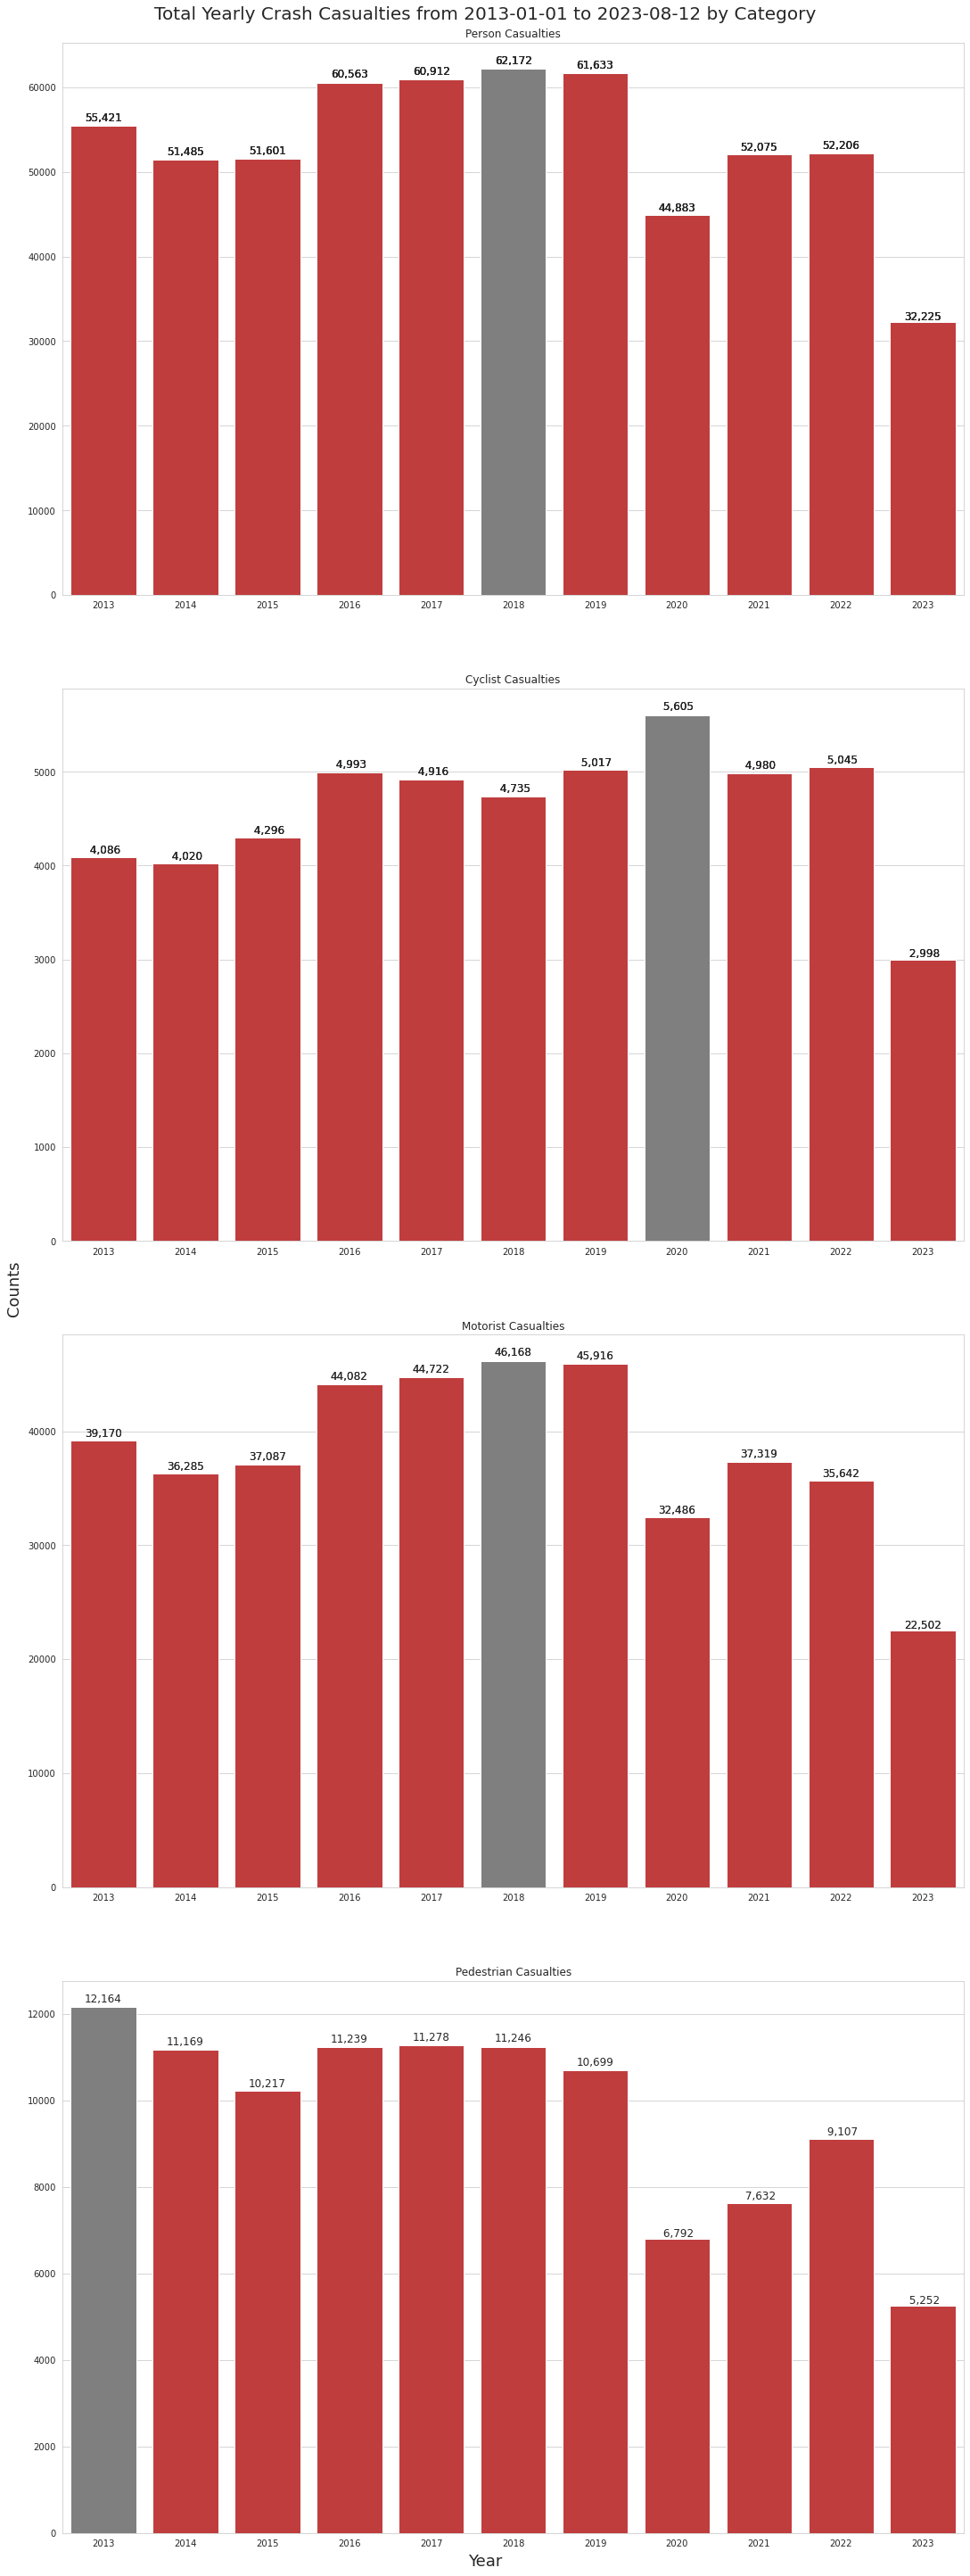

In [115]:
''' Plot charts for crash casualties based on the Year'''

col_ct = 1
#  Create the outer figure box
fig, axes = plt.subplots(4, col_ct, figsize=(
    15, 40), layout="constrained", gridspec_kw=gridspec_kw)
fig.suptitle("Total Yearly Crash Casualties from {0} to {1} by Category".format(
    start_date, end_date), fontsize=title_fontsize)
fig.supxlabel("Year", fontsize=label_fontsize)
fig.supylabel("Counts", fontsize=label_fontsize)


crash_casualty_data = create_grouped_casualty_data_by_category(
    victim_categories, 'year')
create_bar_plots_for_casualty_data(
    sns, axes, year_order, crash_casualty_data)

<AxesSubplot:xlabel='MONTH_NAME'>

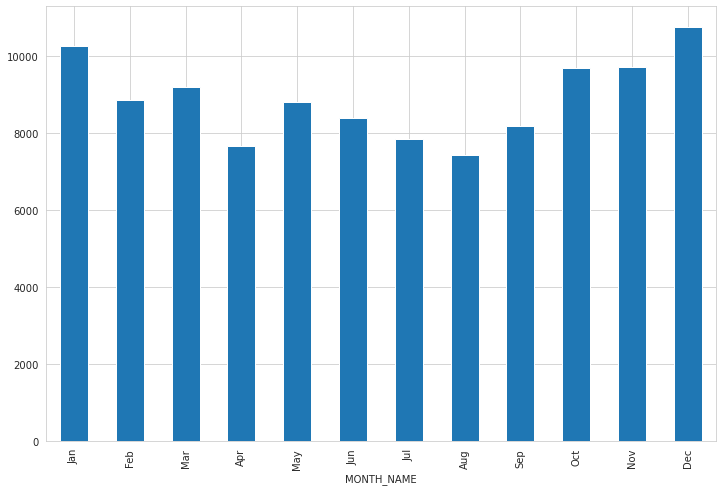

In [332]:
# hide
x = crash.groupby(by=['MONTH_NAME'], as_index=True)[
    'PEDESTRIAN_CASUALTY_COUNT'].sum()
x.loc[month_abbr_order]
x.loc[month_abbr_order].plot(kind='bar')

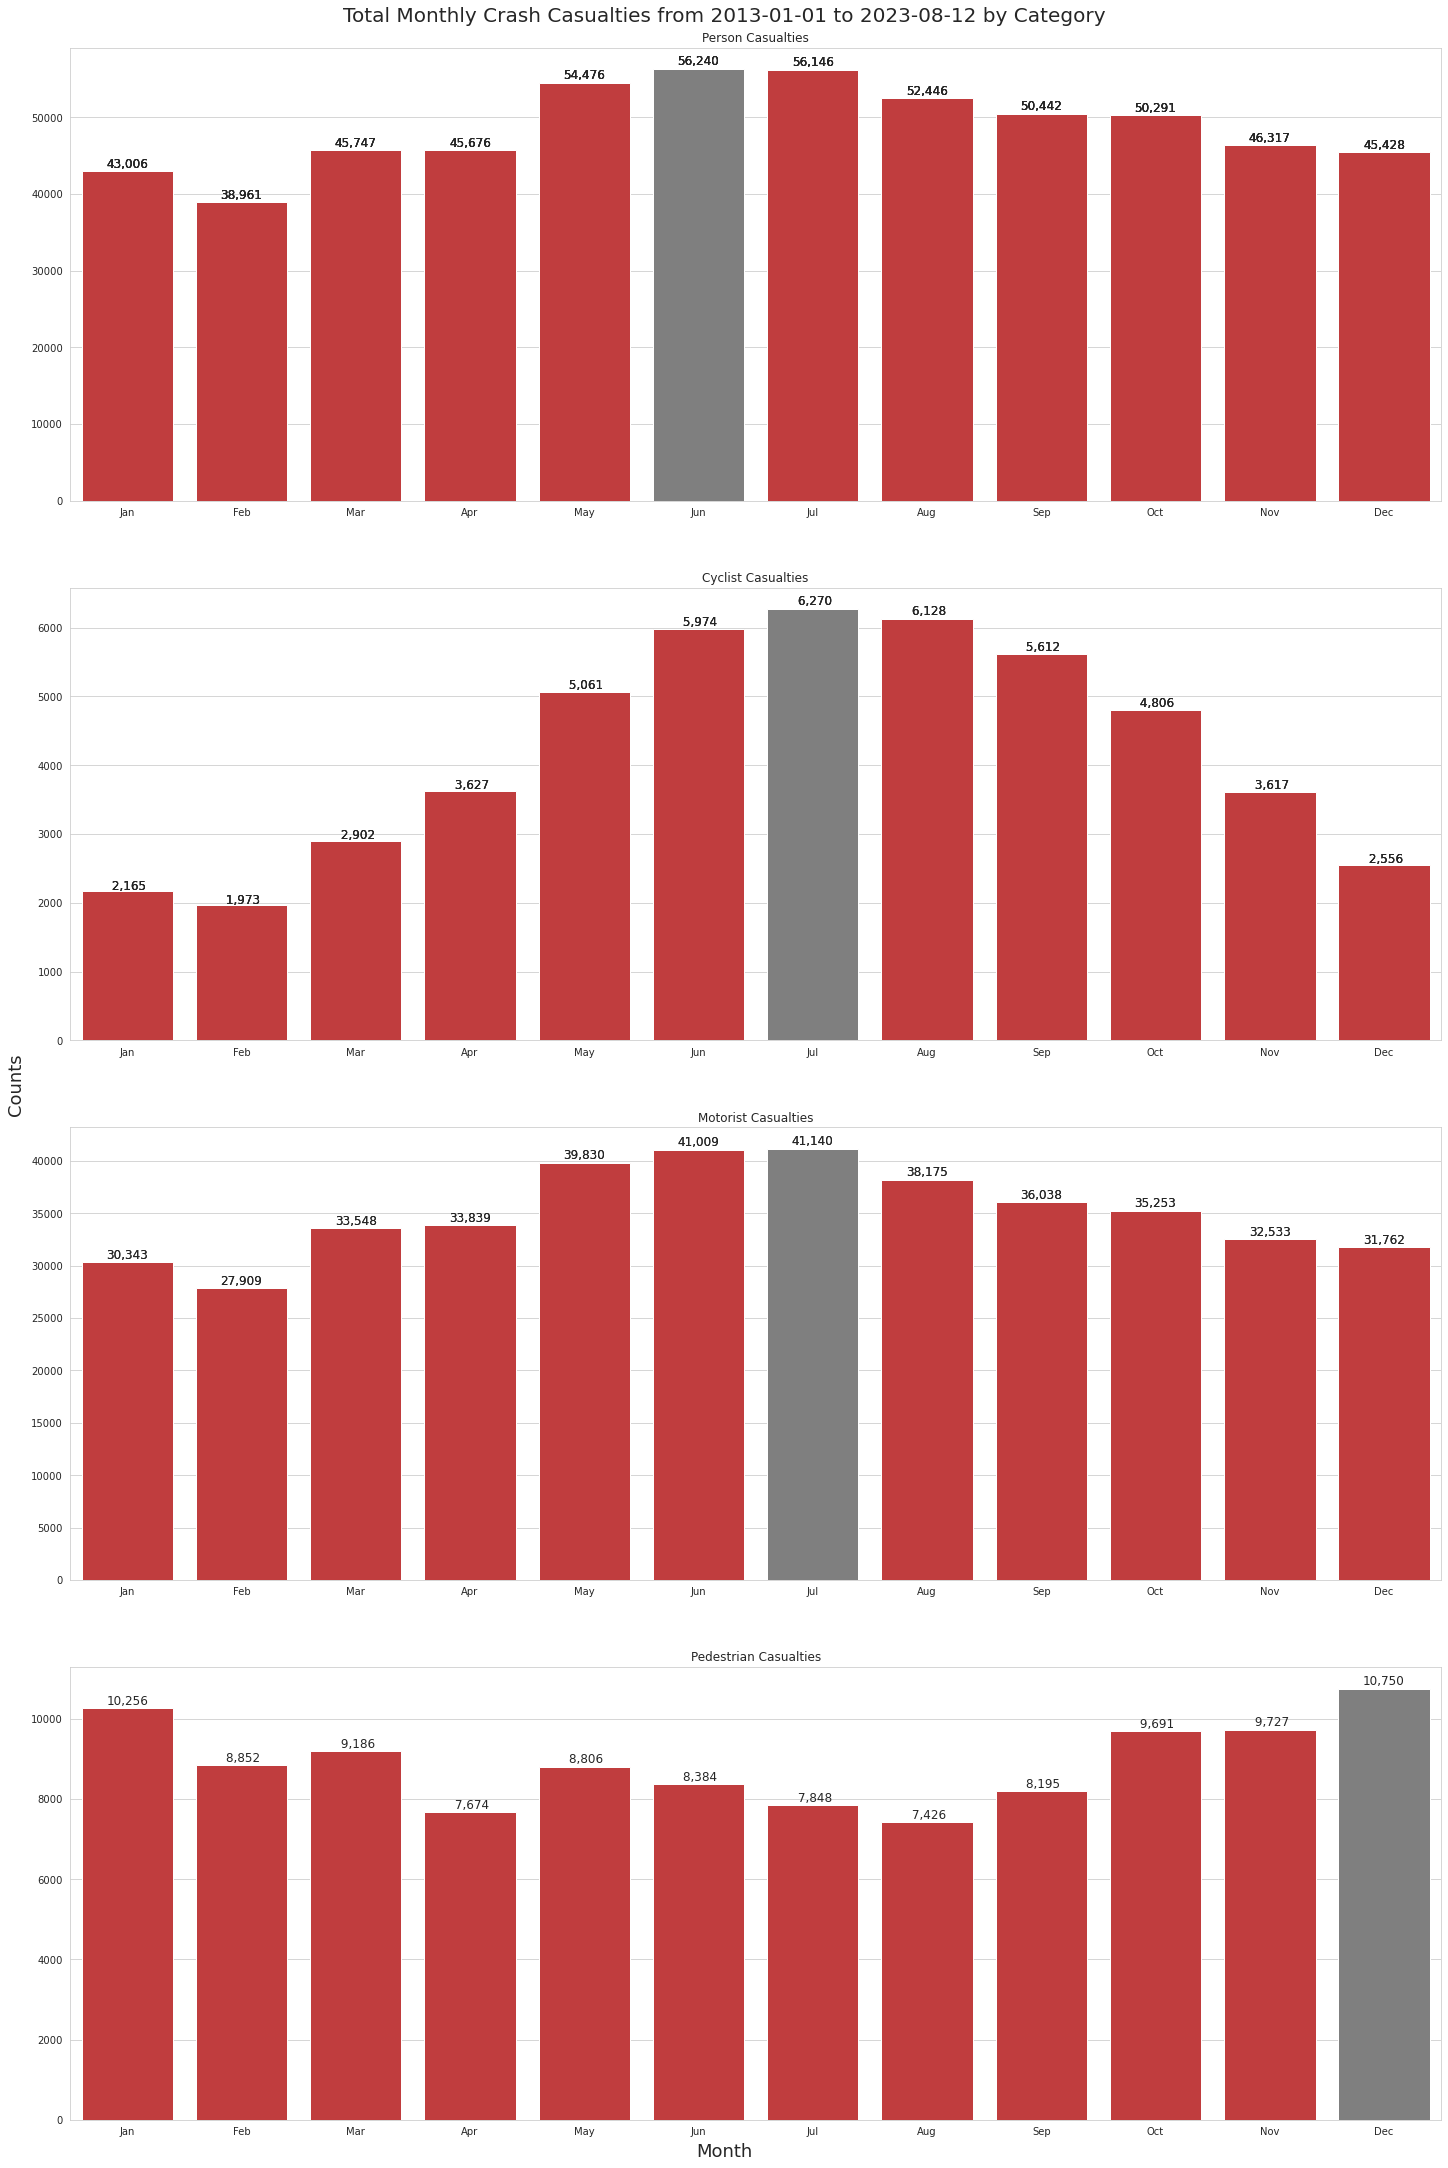

In [116]:
''' Plot charts for crash casualties based on the Month'''

#  Create the outer figure box
col_ct = 1
fig, axes = plt.subplots(4, col_ct, figsize=(
    20, 30), layout="constrained", gridspec_kw=gridspec_kw)

fig.suptitle("Total Monthly Crash Casualties from {0} to {1} by Category".format(
    start_date, end_date), fontsize=title_fontsize)
fig.supxlabel("Month", fontsize=label_fontsize)
fig.supylabel("Counts", fontsize=label_fontsize)

crash_casualty_data = create_grouped_casualty_data_by_category(
    victim_categories, 'month_name', month_abbr_order)
create_bar_plots_for_casualty_data(
    sns, axes, month_abbr_order, crash_casualty_data)

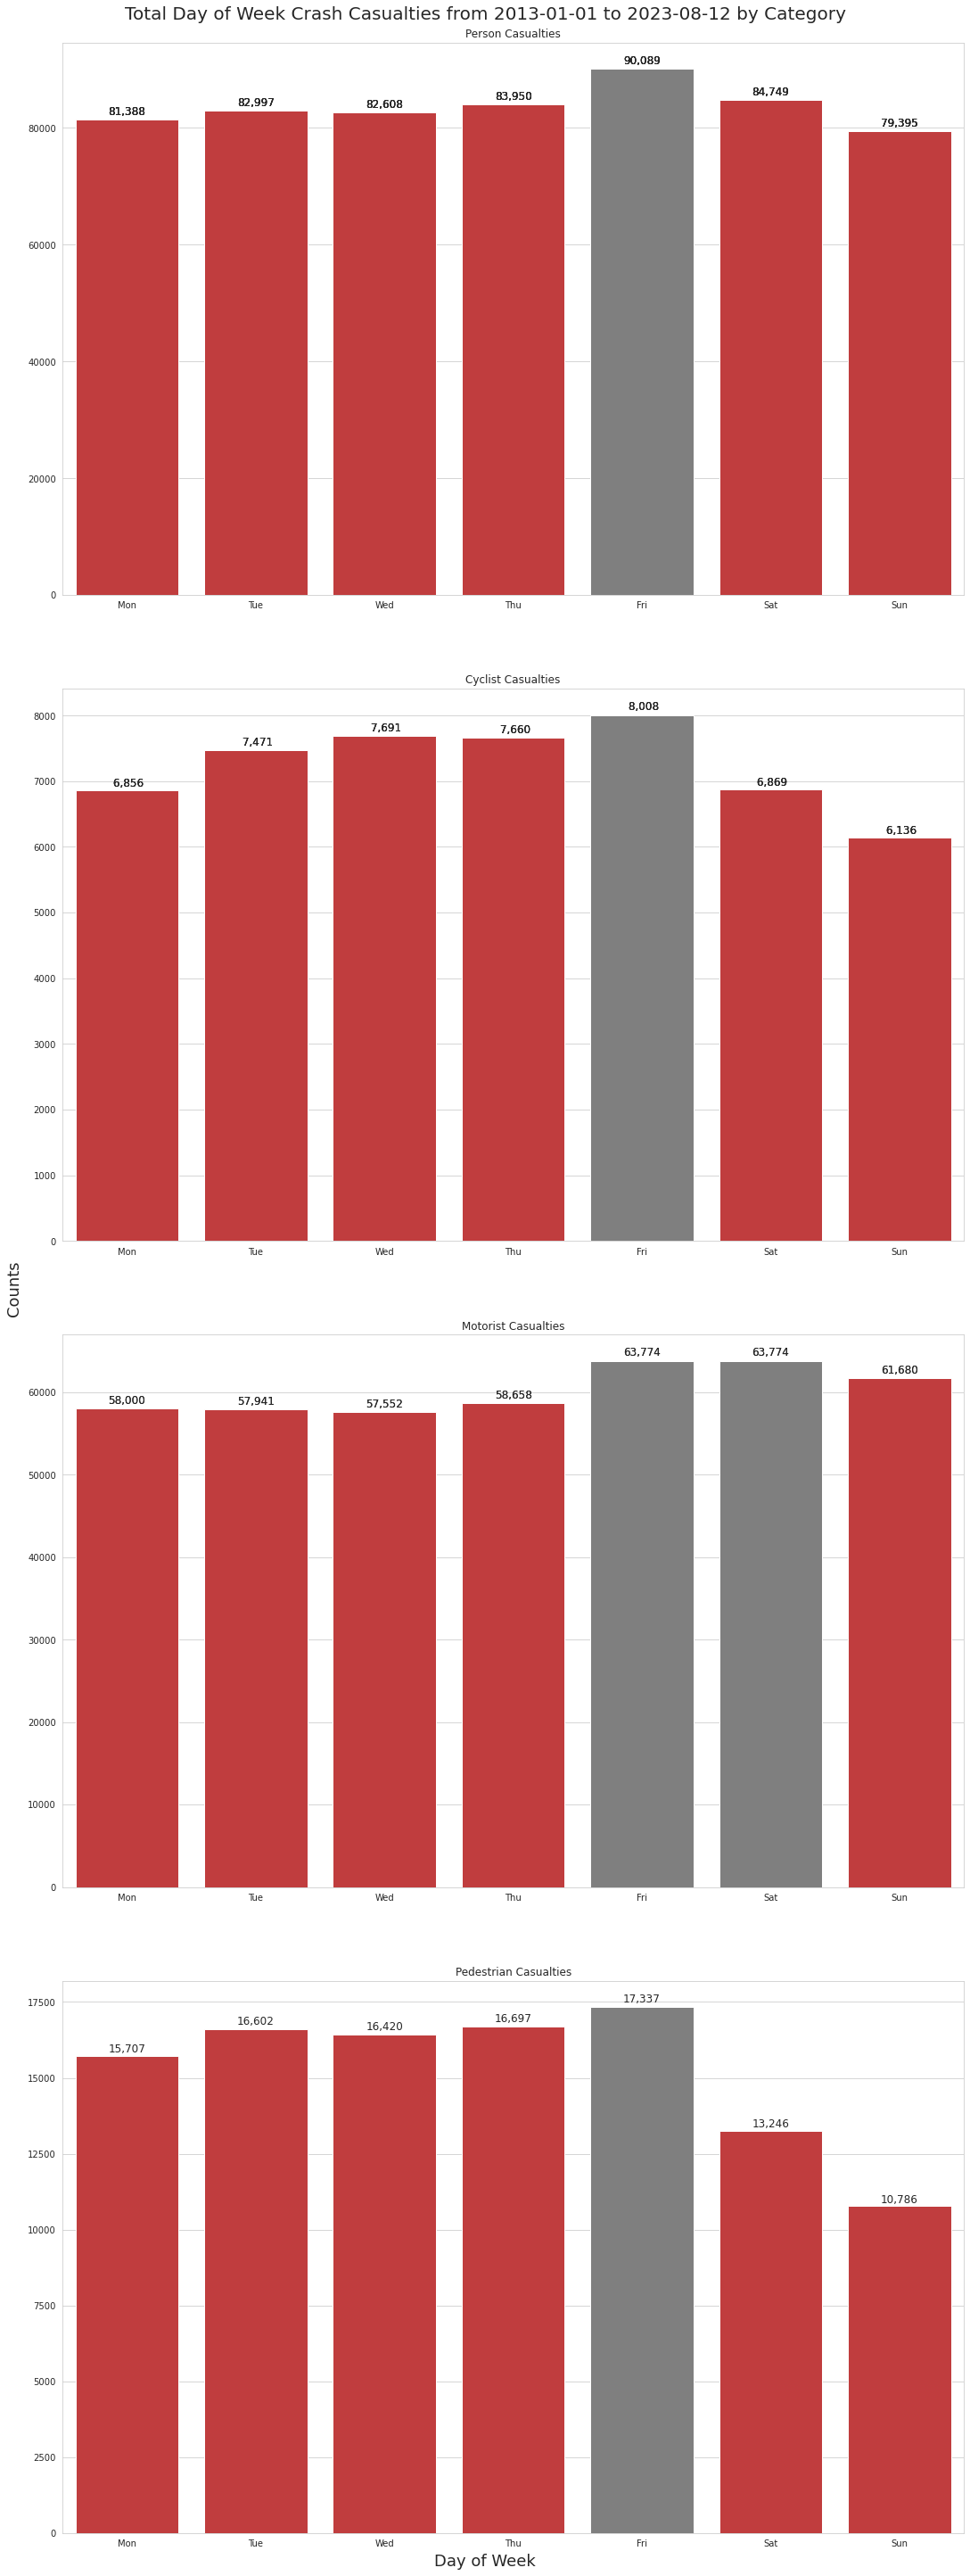

In [334]:
'''
Plot Charts for Day of Week Statistics
'''
col_ct = 1
fig, axes = plt.subplots(4, col_ct, figsize=(
    15, 40), layout="constrained", gridspec_kw=gridspec_kw)

fig.suptitle("Total Day of Week Crash Casualties from {0} to {1} by Category".format(
    start_date, end_date), fontsize=title_fontsize)
fig.supxlabel("Day of Week", fontsize=label_fontsize)
fig.supylabel("Counts", fontsize=label_fontsize)

# crash.set_index('MONTH_NAME').loc[month_abbr_order].groupby(by=['MONTH_NAME']).agg({'PEDESTRIAN_CASUALTY_COUNT': 'sum'}).plot(kind='bar')
crash_casualty_data = create_grouped_casualty_data_by_category(
    victim_categories, 'day_name', day_abbr_order)
crash_casualty_data
create_bar_plots_for_casualty_data(
    sns, axes, day_abbr_order, crash_casualty_data)

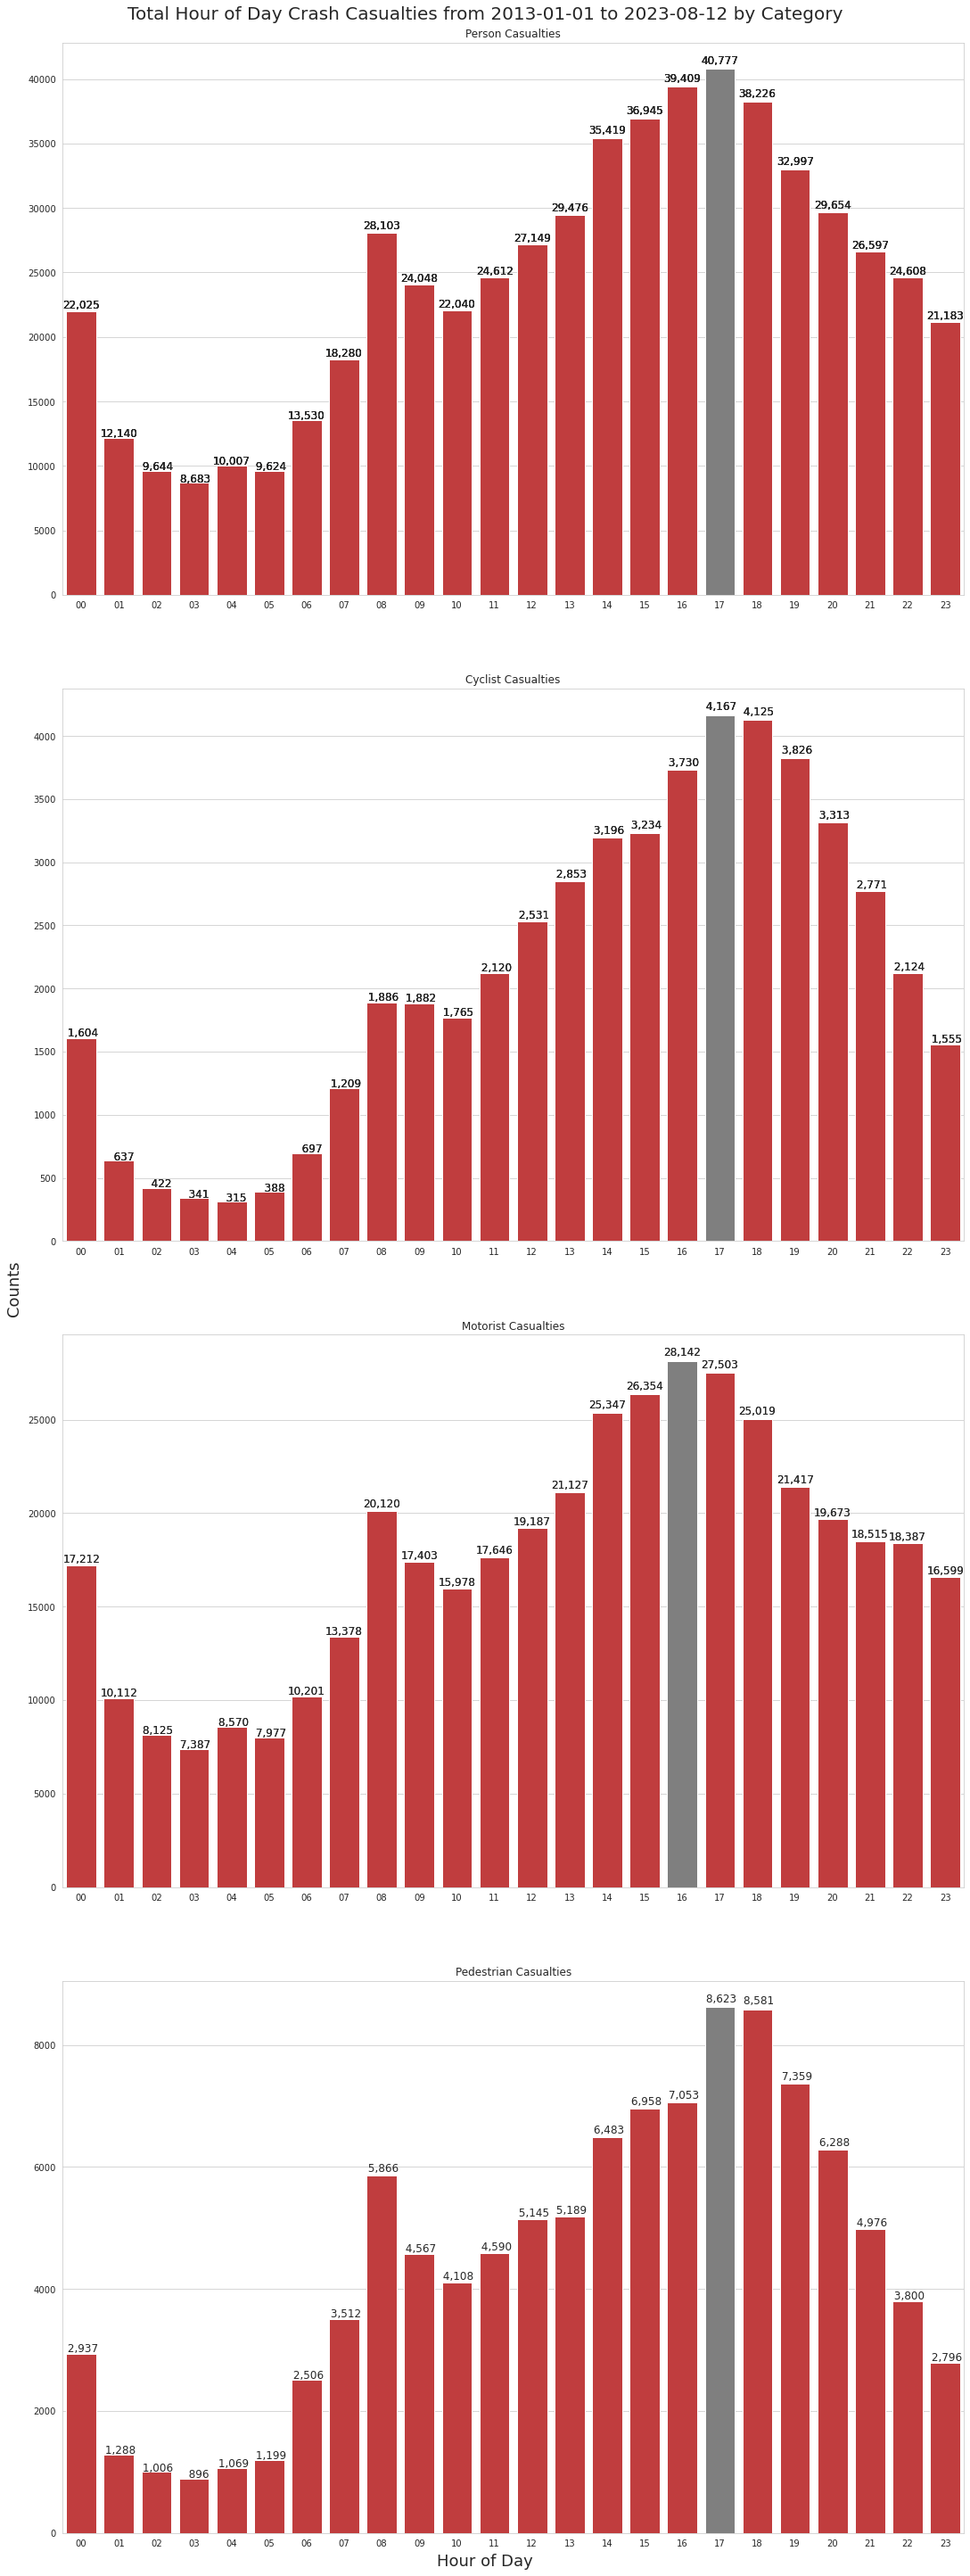

In [335]:
''' Plot charts for crash casualties based on the Hour of Day'''

#  Create the outer figure box
col_ct = 1
fig, axes = plt.subplots(4, col_ct, figsize=(
    15, 40), layout="constrained", gridspec_kw=gridspec_kw)

fig.suptitle("Total Hour of Day Crash Casualties from {0} to {1} by Category".format(
    start_date, end_date), fontsize=title_fontsize)
fig.supxlabel("Hour of Day", fontsize=label_fontsize)
fig.supylabel("Counts", fontsize=label_fontsize)

crash_casualty_data = create_grouped_casualty_data_by_category(
    victim_categories, 'hour', hour_order)

#  Create the inner charts
create_bar_plots_for_casualty_data(
    sns, axes, hour_order, crash_casualty_data)

In [57]:
crash.groupby(by=['YEAR']).agg({'NUM_CYCLISTS_KILLED': 'sum', 'NUM_CYCLISTS_INJURED': 'sum'}).sort_values(
    by=['NUM_CYCLISTS_KILLED', 'NUM_CYCLISTS_INJURED'], ascending=False)

,NUM_CYCLISTS_KILLED,NUM_CYCLISTS_INJURED
YEAR,,
2019,31,4986
2020,29,5576
2017,27,4889
2023,21,2977
2014,20,4000
2022,19,5026
2021,19,4961
2016,18,4975
2015,15,4281


In [58]:
# hide
crash.groupby(by=['YEAR']).agg({'NUM_PEDESTRIANS_KILLED': 'sum', 'NUM_PEDESTRIANS_INJURED': 'sum'}).sort_values(
    by=['NUM_PEDESTRIANS_INJURED', 'NUM_PEDESTRIANS_KILLED'], ascending=False)
# by=['NUM_PEDESTRIANS_KILLED', 'NUM_PEDESTRIANS_INJURED'], ascending=False)

,NUM_PEDESTRIANS_KILLED,NUM_PEDESTRIANS_INJURED
YEAR,,
2013,176,11988
2017,127,11151
2018,123,11123
2016,149,11090
2014,133,11036
2019,131,10568
2015,133,10084
2022,132,8975
2021,131,7501


In [60]:
crash.groupby(by=['MONTH_NAME']).agg({'NUM_PEDESTRIANS_KILLED': 'sum', 'NUM_PEDESTRIANS_INJURED': 'sum'}).sort_values(
    by=['NUM_PEDESTRIANS_INJURED', 'NUM_PEDESTRIANS_KILLED'], ascending=False)

,NUM_PEDESTRIANS_KILLED,NUM_PEDESTRIANS_INJURED
MONTH_NAME,,
Dec,136,10614
Jan,123,10133
Nov,151,9576
Oct,138,9553
Mar,107,9079
Feb,107,8745
May,106,8700
Jun,97,8287
Sep,117,8078


In [39]:
crash.groupby(by=['MONTH_NAME']).agg({'NUM_CYCLISTS_KILLED': 'sum', 'NUM_CYCLISTS_INJURED': 'sum'}).sort_values(
    by=['NUM_CYCLISTS_INJURED', 'NUM_CYCLISTS_KILLED'], ascending=False)

,NUM_CYCLISTS_KILLED,NUM_CYCLISTS_INJURED
MONTH_NAME,,
July,26,6244
August,20,6108
June,36,5938
September,25,5587
May,20,5041
October,17,4789
April,19,3608
November,15,3602
March,7,2895


In [40]:
crash.groupby(by=['YEAR']).agg({'NUM_MOTORISTS_KILLED': 'sum', 'NUM_MOTORISTS_INJURED': 'sum'}).sort_values(
    by=['NUM_MOTORISTS_KILLED', 'NUM_MOTORISTS_INJURED'], ascending=False)

,NUM_MOTORISTS_KILLED,NUM_MOTORISTS_INJURED
YEAR,,
2020,139,32347
2021,134,37185
2022,116,35526
2013,110,39060
2014,109,36176
2017,107,44615
2018,98,46070
2015,95,36992
2019,82,45834


In [41]:
killed_injured_by_zip = crash.groupby(by=['ZIP_CODE']).agg({'NUM_PERSONS_KILLED': 'sum', 'NUM_PERSONS_INJURED': 'sum'}).sort_values(
    by=['NUM_PERSONS_KILLED', 'NUM_PERSONS_INJURED'], ascending=False)
injured_killed_by_zip = crash.groupby(by=['ZIP_CODE']).agg({'NUM_PERSONS_KILLED': 'sum', 'NUM_PERSONS_INJURED': 'sum'}).sort_values(
    by=['NUM_PERSONS_INJURED', 'NUM_PERSONS_KILLED'], ascending=False)
print("     5 Worst zip codes for crash deaths.")
print(killed_injured_by_zip.head(5))
print("     5 Worst zip codes for crash injuries.")
print(injured_killed_by_zip.head(5))

     5 Worst zip codes for crash deaths.
          NUM_PERSONS_KILLED  NUM_PERSONS_INJURED
ZIP_CODE                                         
UNKNOWN                 1145               205507
11236                     45                 7482
11207                     32                 9956
11234                     28                 5460
11208                     25                 6044
     5 Worst zip codes for crash injuries.
          NUM_PERSONS_KILLED  NUM_PERSONS_INJURED
ZIP_CODE                                         
UNKNOWN                 1145               205507
11207                     32                 9956
11236                     45                 7482
11203                     13                 7367
11212                     17                 6631
